we will use `Sympy` to create a function as an object, substitute variables in it, change the value of variables and plot the results, derive and integrate the function, and set equivalences to solve for the variable. To do so, we begin by importing the libraries we will use.

In [2]:
import matplotlib.pyplot as plt
import sympy as sp


First, we create all the vriables we need as symbols using the `Symbol` class. We will need to make multiple symbols. To do so at once, we will use the `symbols` function instead, setting it equal to the variables we will use later.

In [19]:
x, A, B, C, y,v,z,f = sp.symbols('x,C1,C2,C3,\gamma_1,\gamma_2,\gamma_3, f')


Now we will make the symbols into a function. Now that they are symbols, it is fairly simple to make them into a function. We write it out, using the symbols as the variables and writing 'sin()' for the sines in the function.

In [23]:
f = (A*sp.sin(y*x)+B*sp.sin(v*x)+C*sp.sin(z*x))
f

C1*sin(\gamma_1*x) + C2*sin(\gamma_2*x) + C3*sin(\gamma_3*x)

Now we will substitute A, B, and C for numerical values. We do so using the `.subs()` function, which takes as parameters the variable to be substituted and the substitute.

In [25]:
f =f.subs([(y,float(2)*sp.pi),(v,4*sp.pi),(z,6*sp.pi)])
f

C1*sin(2*pi*x) + C2*sin(4*pi*x) + C3*sin(6*pi*x)

Next, we will write a Python function to allow users to input values for the remaining symbols. Then we will make a graph of the resulting function using `Numpy` and `Pyplot` to create a graph. 

In [46]:
def enterVar(f):
    #print()
    a = float(input("Enter the first value: "))
    b = float(input("Enter the second value: "))
    c = float(input("Enter the third value: "))
    f = f.subs([(A,a),(B,b),(C,c)])
    return f
f= enterVar(f)
    

Enter the first value: 5
Enter the second value: 5
Enter the third value: 5


Having written our function, we will make a Numpy array for values between 0 and pi, and use the function `lambdify` to make the graph, creating a new variable `g` in the process. The parameters of lambdify will be a list of the variables that the function will be of - in this case only x - and the function we are setting it equivalent to - f. We are saying g(x) = f, and f is a function which contains x.

Then we will make a graph using Pyplot, making a figure and axes with the subplot function and setting the axes equal to g and the array.

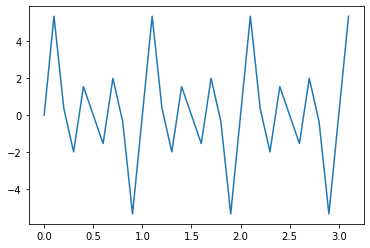

In [47]:
import numpy as np

xGraph = np.arange(0, sp.pi, 0.1)
xGraph = xGraph.astype('float64')
g = sp.lambdify([x], f, 'numpy')
yGraph = g(xGraph)

#f, yGraph



fig, ax = plt.subplots()
ax.plot(xGraph, yGraph);

#xGraph


Derivations and integrations are fairly simple in `Sympy`, with each having a corresponding function. Each ahs two parameters: the function to take the derivative of or to integrate, and the value to do so with respect to. There are additional, optional parameters for things like the order and limits of integration, but we will not use them here.

In [49]:
w = sp.diff(f,x)
q = sp.integrate(f,x)

w,q

(2.0*pi*cos(2*pi*x) + 8.0*pi*cos(4*pi*x) + 18.0*pi*cos(6*pi*x),
 -0.5*cos(2*pi*x)/pi - 0.5*cos(4*pi*x)/pi - 0.5*cos(6*pi*x)/pi)

Finally, we will reset our equations and then solve them for specific variables using the `solve()` function, which has two parameters:  the equation being solved, and the variable being solved for.

By default, the functions are set to equal zero. To change that can be done with simple subtraction. If c =2, c-2 = 0. Subtracting two from the equation when we define it allows for us to solve for C3 when f(x) = 2.

In [73]:
f = (A*sp.sin(y*x)+B*sp.sin(v*x)+C*sp.sin(z*x) +0)
f =f.subs([(y,float(2)*sp.pi),(v,4*sp.pi),(z,6*sp.pi)])




g= (A*sp.sin(y*x)+B*sp.sin(v*x)+C*sp.sin(z*x) -2)
g =g.subs([(y,float(2)*sp.pi),(v,4*sp.pi),(z,6*sp.pi)])

sp.solve(f,C), sp.solve(g,C)



([-(C1*sin(2*pi*x) + C2*sin(4*pi*x))/sin(6*pi*x)],
 [(-C1*sin(2*pi*x) - C2*sin(4*pi*x) + 2)/sin(6*pi*x)])